In [1]:
import numpy as np
import pylab as pl # SE TARDA
from matplotlib import cm
import matplotlib.pyplot as plt
#from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# VARIABLES A TRATAR
pt = np.linspace(0, 300,10)
eta = np.linspace(0, 3.9, 10)
pt_m, eta_m = np.meshgrid(pt, eta)


def Mu_track(eta_mesh, pt_mesh, n=True):
    if n:
        ###################################
        # Muon tracking efficiency Default
        ###################################
        out =   (pt_mesh <= 0.1) * 0+ \
                (abs(eta_mesh) <= 1.5) * (pt_mesh > 0.1) * (pt_mesh <= 1) * 0.75 + \
                (abs(eta_mesh) <= 1.5) * (pt_mesh > 1) * (pt_mesh <= 1.0e3) * 0.99 + \
                (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0e3) * (0.99*np.exp(0.5 - pt_mesh*5.0e-4)) + \
                (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 0.1) * (pt_mesh <= 1) * 0.70 + \
                (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1) * (pt_mesh <= 1.0e3) * 0.98 + \
                (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0e3) * (0.98*np.exp(0.5 - pt_mesh*5.0e-4)) + \
                (abs(eta_mesh) > 2.5) * 0.0
    else:
        #############################
        # Muon tracking efficiency HL
        #############################
        out =   (pt_mesh <= 0.5) * 0+ \
                (abs(eta_mesh) <= 1.2) * (pt_mesh > 0.5) * (pt_mesh <= 1) * (pt_mesh * 1) + \
                (abs(eta_mesh) <= 1.2) * (pt_mesh > 1) * 1+ \
                (abs(eta_mesh) > 1.2) * (abs(eta_mesh) <= 2.8) * (pt_mesh > 0.5) * (pt_mesh <= 1) * (pt_mesh*1) + \
                (abs(eta_mesh) > 1.2) * (abs(eta_mesh) <= 2.8) * (pt_mesh > 1) * 1+ \
                (abs(eta_mesh) > 2.8) * (abs(eta_mesh) <= 4) * (pt_mesh > 0.5) * (pt_mesh <= 1) * (pt_mesh*0.95) + \
                (abs(eta_mesh) > 2.8) * (abs(eta_mesh) <= 4) * (pt_mesh > 1) * 0.95 + \
                (abs(eta_mesh) > 4) * 0.0
        
        
    return out
def Mu_resl(eta_mesh, pt_mesh, n=True):
    if n:
        out = (abs(eta_mesh) <= 0.5)*(pt_mesh > 0.1)*np.sqrt(0.01**2 + pt_mesh**2*1.0e-4**2) + \
              (abs(eta_mesh) > 0.5)*(abs(eta_mesh) <= 1.5)*(pt_mesh > 0.1)*np.sqrt(0.015**2 + pt_mesh**2*1.5e-4**2) + \
              (abs(eta_mesh) > 1.5)*(abs(eta_mesh) <= 2.5)*(pt_mesh > 0.1)*np.sqrt(0.025**2 + pt_mesh**2*3.5e-4**2)
    else:
        out= \
            ((abs(eta_mesh) >= 0) * ( abs(eta_mesh) < 0.20) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0457888 +
             (abs(eta_mesh) >= 0) * ( abs(eta_mesh) < 0.20) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.04579 + (pt_mesh-1)* 0.045) +
             (abs(eta_mesh) >= 0) * ( abs(eta_mesh) < 0.20) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.04983 + (pt_mesh-10)* 0.047) +
             (abs(eta_mesh) >= 0) * ( abs(eta_mesh) < 0.20) * (pt_mesh >= 10) * (0.09244/5.*pt_mesh/10+ 4./5.*0.09244) +
             (abs(eta_mesh) >= 0.20 ) * ( abs(eta_mesh) < 0.40) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0505011 +
             (abs(eta_mesh) >= 0.20 ) * ( abs(eta_mesh) < 0.40) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.05050 + (pt_mesh-1)* 0.033) +
             (abs(eta_mesh) >= 0.20 ) * ( abs(eta_mesh) < 0.40) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.05343 + (pt_mesh-10)* 0.043) +
             (abs(eta_mesh) >= 0.20 ) * ( abs(eta_mesh) < 0.40) * (pt_mesh >= 10) * (0.09172/5.*pt_mesh/10+ 4./5.*0.09172) +
             (abs(eta_mesh) >= 0.40 ) * ( abs(eta_mesh) < 0.60) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0510573 +
             (abs(eta_mesh) >= 0.40 ) * ( abs(eta_mesh) < 0.60) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.05106 + (pt_mesh-1)* 0.023) +
             (abs(eta_mesh) >= 0.40 ) * ( abs(eta_mesh) < 0.60) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.05317 + (pt_mesh-10)* 0.042) +
             (abs(eta_mesh) >= 0.40 ) * ( abs(eta_mesh) < 0.60) * (pt_mesh >= 10) * (0.09077/5.*pt_mesh/10+ 4./5.*0.09077) +
             (abs(eta_mesh) >= 0.60 ) * ( abs(eta_mesh) < 0.80) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0578020 +
             (abs(eta_mesh) >= 0.60 ) * ( abs(eta_mesh) < 0.80) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.05780 + (pt_mesh-1)* -0) +
             (abs(eta_mesh) >= 0.60 ) * ( abs(eta_mesh) < 0.80) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.05779 + (pt_mesh-10)* 0.038) +
             (abs(eta_mesh) >= 0.60 ) * ( abs(eta_mesh) < 0.80) * (pt_mesh >= 10) * (0.09177/5.*pt_mesh/10+ 4./5.*0.09177) +
             (abs(eta_mesh) >= 0.80 ) * ( abs(eta_mesh) < 1) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0728723 +
             (abs(eta_mesh) >= 0.80 ) * ( abs(eta_mesh) < 1) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.07287 + (pt_mesh-1)* -0.031) +
             (abs(eta_mesh) >= 0.80 ) * ( abs(eta_mesh) < 1) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.07011 + (pt_mesh-10)* 0.038) +
             (abs(eta_mesh) >= 0.80 ) * ( abs(eta_mesh) < 1) * (pt_mesh >= 10) * (0.010429/5.*pt_mesh/10+ 4./5.*0.010429) +
             (abs(eta_mesh) >= 1) * ( abs(eta_mesh) < 1.20) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.01045117 +
             (abs(eta_mesh) >= 1) * ( abs(eta_mesh) < 1.20) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.010451 + (pt_mesh-1)* -0.051) +
             (abs(eta_mesh) >= 1) * ( abs(eta_mesh) < 1.20) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.09989 + (pt_mesh-10)* 0.043) +
             (abs(eta_mesh) >= 1) * ( abs(eta_mesh) < 1.20) * (pt_mesh >= 10) * (0.013867/5.*pt_mesh/10+ 4./5.*0.013867) +
             (abs(eta_mesh) >= 1.20 ) * ( abs(eta_mesh) < 1.40) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.01477199 +
             (abs(eta_mesh) >= 1.20 ) * ( abs(eta_mesh) < 1.40) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.014772 + (pt_mesh-1)* -0.0128) +
             (abs(eta_mesh) >= 1.20 ) * ( abs(eta_mesh) < 1.40) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.013616 + (pt_mesh-10)* 0.035) +
             (abs(eta_mesh) >= 1.20 ) * ( abs(eta_mesh) < 1.40) * (pt_mesh >= 10) * (0.01680/5.*pt_mesh/10+ 4./5.*0.01680) +
             (abs(eta_mesh) >= 1.40 ) * ( abs(eta_mesh) < 1.60) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.01731474 +
             (abs(eta_mesh) >= 1.40 ) * ( abs(eta_mesh) < 1.60) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.017315 + (pt_mesh-1)* -0.0208) +
             (abs(eta_mesh) >= 1.40 ) * ( abs(eta_mesh) < 1.60) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.015439 + (pt_mesh-10)* 0.030) +
             (abs(eta_mesh) >= 1.40 ) * ( abs(eta_mesh) < 1.60) * (pt_mesh >= 10) * (0.018161/5.*pt_mesh/10+ 4./5.*0.018161) +
             (abs(eta_mesh) >= 1.60 ) * ( abs(eta_mesh) < 1.80) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.01942025 +
             (abs(eta_mesh) >= 1.60 ) * ( abs(eta_mesh) < 1.80) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.019420 + (pt_mesh-1)* -0.0417) +
             (abs(eta_mesh) >= 1.60 ) * ( abs(eta_mesh) < 1.80) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.015669 + (pt_mesh-10)* 0.026) +
             (abs(eta_mesh) >= 1.60 ) * ( abs(eta_mesh) < 1.80) * (pt_mesh >= 10) * (0.018039/5.*pt_mesh/10+ 4./5.*0.018039) +
             (abs(eta_mesh) >= 1.80 ) * ( abs(eta_mesh) < 2) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.02201432 +
             (abs(eta_mesh) >= 1.80 ) * ( abs(eta_mesh) < 2) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.022014 + (pt_mesh-1)* -0.0667) +
             (abs(eta_mesh) >= 1.80 ) * ( abs(eta_mesh) < 2) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.016012 + (pt_mesh-10)* 0.045) +
             (abs(eta_mesh) >= 1.80 ) * ( abs(eta_mesh) < 2) * (pt_mesh >= 10) * (0.02098/5.*pt_mesh/10+ 4./5.*0.02098) +
             (abs(eta_mesh) >= 2) * ( abs(eta_mesh) < 2.20) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0257430 +
             (abs(eta_mesh) >= 2) * ( abs(eta_mesh) < 2.20) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.025743 + (pt_mesh-1)* -0.01118) +
             (abs(eta_mesh) >= 2) * ( abs(eta_mesh) < 2.20) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.015681 + (pt_mesh-10)* 0.051) +
             (abs(eta_mesh) >= 2) * ( abs(eta_mesh) < 2.20) * (pt_mesh >= 10) * (0.020289/5.*pt_mesh/10+ 4./5.*0.020289) +
             (abs(eta_mesh) >= 2.20 ) * ( abs(eta_mesh) < 2.40) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.02885821 +
             (abs(eta_mesh) >= 2.20 ) * ( abs(eta_mesh) < 2.40) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.028858 + (pt_mesh-1)* -0.01345) +
             (abs(eta_mesh) >= 2.20 ) * ( abs(eta_mesh) < 2.40) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.016753 + (pt_mesh-10)* 0.053) +
             (abs(eta_mesh) >= 2.20 ) * ( abs(eta_mesh) < 2.40) * (pt_mesh >= 10) * (0.021524/5.*pt_mesh/10+ 4./5.*0.021524) +
             (abs(eta_mesh) >= 2.40 ) * ( abs(eta_mesh) < 2.60) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.03204812 +
             (abs(eta_mesh) >= 2.40 ) * ( abs(eta_mesh) < 2.60) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.032048 + (pt_mesh-1)* -0.01212) +
             (abs(eta_mesh) >= 2.40 ) * ( abs(eta_mesh) < 2.60) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.021138 + (pt_mesh-10)* 0.037) +
             (abs(eta_mesh) >= 2.40 ) * ( abs(eta_mesh) < 2.60) * (pt_mesh >= 10) * (0.024477/5.*pt_mesh/10+ 4./5.*0.024477) +
             (abs(eta_mesh) >= 2.60 ) * ( abs(eta_mesh) < 2.80) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.03950405 +
             (abs(eta_mesh) >= 2.60 ) * ( abs(eta_mesh) < 2.80) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.039504 + (pt_mesh-1)* -0.01386) +
             (abs(eta_mesh) >= 2.60 ) * ( abs(eta_mesh) < 2.80) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.027026 + (pt_mesh-10)* 0.037) +
             (abs(eta_mesh) >= 2.60 ) * ( abs(eta_mesh) < 2.80) * (pt_mesh >= 10) * (0.030392/5.*pt_mesh/10+ 4./5.*0.030392) +
             (abs(eta_mesh) >= 2.80 ) * ( abs(eta_mesh) < 3) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.04084751 +
             (abs(eta_mesh) >= 2.80 ) * ( abs(eta_mesh) < 3) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.040848 + (pt_mesh-1)* -0.01780) +
             (abs(eta_mesh) >= 2.80 ) * ( abs(eta_mesh) < 3) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.024824 + (pt_mesh-10)* 0.029) +
             (abs(eta_mesh) >= 2.80 ) * ( abs(eta_mesh) < 3) * (pt_mesh >= 10) * (0.027445/5.*pt_mesh/10+ 4./5.*0.027445) +
             (abs(eta_mesh) >= 3) * ( abs(eta_mesh) < 3.20) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.04532425 +
             (abs(eta_mesh) >= 3) * ( abs(eta_mesh) < 3.20) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.045324 + (pt_mesh-1)* -0.02497) +
             (abs(eta_mesh) >= 3) * ( abs(eta_mesh) < 3.20) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.022851 + (pt_mesh-10)* 0.024) +
             (abs(eta_mesh) >= 3) * ( abs(eta_mesh) < 3.20) * (pt_mesh >= 10) * (0.025053/5.*pt_mesh/10+ 4./5.*0.025053) +
             (abs(eta_mesh) >= 3.20 ) * ( abs(eta_mesh) < 3.40) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.06418925 +
             (abs(eta_mesh) >= 3.20 ) * ( abs(eta_mesh) < 3.40) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.064189 + (pt_mesh-1)* -0.04055) +
             (abs(eta_mesh) >= 3.20 ) * ( abs(eta_mesh) < 3.40) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.027691 + (pt_mesh-10)* 0.034) +
             (abs(eta_mesh) >= 3.20 ) * ( abs(eta_mesh) < 3.40) * (pt_mesh >= 10) * (0.030710/5.*pt_mesh/10+ 4./5.*0.030710) +
             (abs(eta_mesh) >= 3.40 ) * ( abs(eta_mesh) < 3.60) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.0768250 +
             (abs(eta_mesh) >= 3.40 ) * ( abs(eta_mesh) < 3.60) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.076825 + (pt_mesh-1)* -0.04510) +
             (abs(eta_mesh) >= 3.40 ) * ( abs(eta_mesh) < 3.60) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.036234 + (pt_mesh-10)* 0.049) +
             (abs(eta_mesh) >= 3.40 ) * ( abs(eta_mesh) < 3.60) * (pt_mesh >= 10) * (0.040629/5.*pt_mesh/10+ 4./5.*0.040629) +
             (abs(eta_mesh) >= 3.60 ) * ( abs(eta_mesh) < 3.80) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.09796358 +
             (abs(eta_mesh) >= 3.60 ) * ( abs(eta_mesh) < 3.80) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.097964 + (pt_mesh-1)* -0.05758) +
             (abs(eta_mesh) >= 3.60 ) * ( abs(eta_mesh) < 3.80) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.046145 + (pt_mesh-10)* 0.069) +
             (abs(eta_mesh) >= 3.60 ) * ( abs(eta_mesh) < 3.80) * (pt_mesh >= 10) * (0.052345/5.*pt_mesh/10+ 4./5.*0.052345) +
             (abs(eta_mesh) >= 3.80 ) * ( abs(eta_mesh) < 4) * (pt_mesh >= 0) * ( pt_mesh < 1) * 0.13415929 +
             (abs(eta_mesh) >= 3.80 ) * ( abs(eta_mesh) < 4) * (pt_mesh >= 1) * ( pt_mesh < 10) * (0.134159 + (pt_mesh-1)* -0.08283) +
             (abs(eta_mesh) >= 3.80 ) * ( abs(eta_mesh) < 4) * (pt_mesh >= 10) * ( pt_mesh < 10) * (0.059612 + (pt_mesh-10)* 0.0111) +
             (abs(eta_mesh) >= 3.80 ) * ( abs(eta_mesh) < 4) * (pt_mesh >= 10) * (0.069617/5.*pt_mesh/10+ 4./5.*0.069617))
    return out

In [3]:
#plt.rcParams['figure.figsize'] = [20, 15]

Mu_track_D = Mu_track(eta_m, pt_m)*100
Mu_track_HL = Mu_track(eta_m, pt_m, False)*100
Mu_track_diff = Mu_track_HL - Mu_track_D
Mu_track_ratio = abs(Mu_track_HL - Mu_track_D + .0000001)/(Mu_track_HL + .0000001)

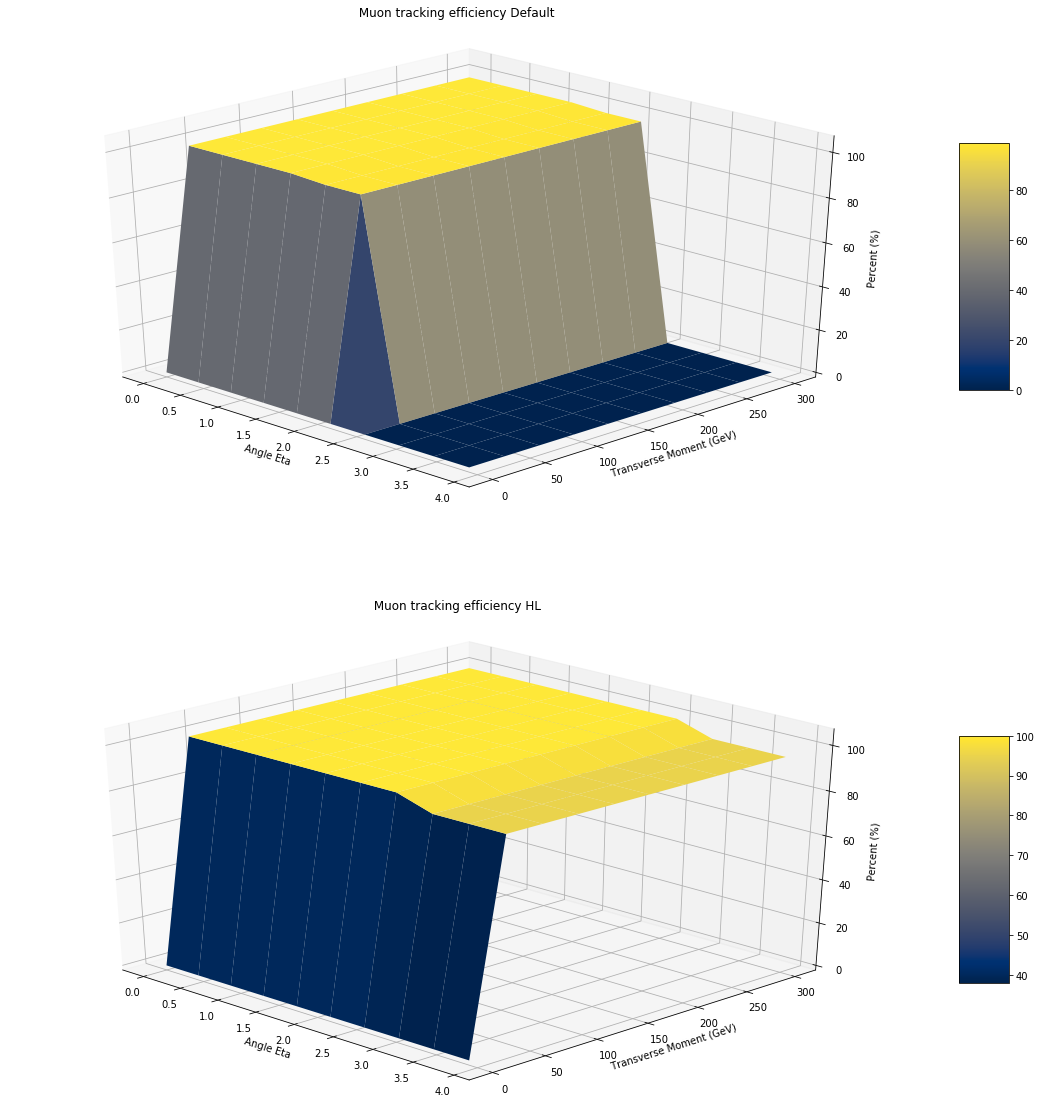

In [20]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
plot1 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_track_D , cmap = 'cividis',
                linewidth=0.5)
ax.set_zlim(0, np.max(Mu_track_HL) + 5)
#plt.range( [0, np.max(Mu_resl_HL)] )

ax.set_title(' Muon tracking efficiency Default ', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(30, -45)
fig.colorbar(plot1, shrink=0.5, aspect=5)

ax = fig.add_subplot(212, projection='3d')
plot2 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_track_HL , cmap = 'cividis')
ax.set_zlim(0, np.max(Mu_track_HL) + 5)
ax.set_title(' Muon tracking efficiency HL ', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(30, -45)
fig.colorbar(plot2, shrink=0.5, aspect=5)

plt.savefig("PDF/Muon tracking efficiency.pdf")

In [21]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
plot1 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_track_diff , cmap = 'ocean')
ax.set_title(' Different in the Muon tracking efficiency (view [50,135])', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(50, 135)
fig.colorbar(plot1, shrink=0.5, aspect=5)

ax = fig.add_subplot(212, projection='3d')
plot2 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_track_ratio , cmap = 'ocean')
ax.set_title(' Error relative in the Muon tracking efficiency (view [50,-135])', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(50, 135)
fig.colorbar(plot2, shrink=0.5, aspect=5)

plt.savefig("PDF/Different in the muon tracking efficiency.pdf")

In [12]:
### Momentum resolution ###
Mu_resl_D = Mu_resl(eta_m, pt_m)*100
Mu_resl_HL = Mu_resl(eta_m, pt_m, False)*100
Mu_resl_diff = Mu_resl_HL - Mu_resl_D
Mu_resl_ratio = (Mu_resl_D )/Mu_resl_HL

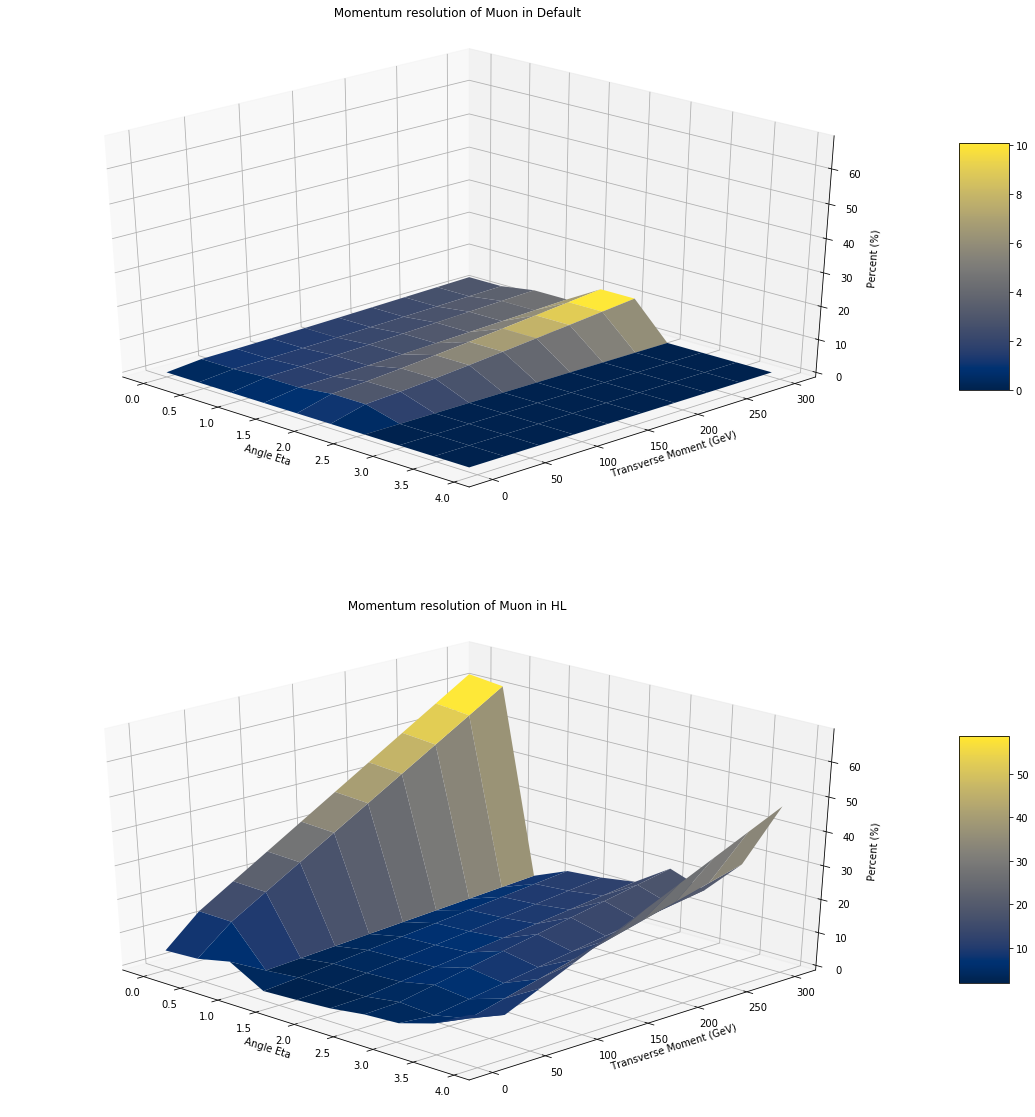

In [19]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
plot1 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_resl_D , cmap = 'cividis',
                linewidth=0.5)
ax.set_zlim(0, np.max(Mu_resl_HL) + 5)
#plt.range( [0, np.max(Mu_resl_HL)] )

ax.set_title(' Momentum resolution of Muon in Default ', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(30, -45)
fig.colorbar(plot1, shrink=0.5, aspect=5)

ax = fig.add_subplot(212, projection='3d')
plot2 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_resl_HL , cmap = 'cividis')
ax.set_zlim(0, np.max(Mu_resl_HL) + 5)
ax.set_title(' Momentum resolution of Muon in HL ', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(30, -45)
fig.colorbar(plot2, shrink=0.5, aspect=5)

plt.savefig("PDF/Momentum resolution of Muon.pdf")

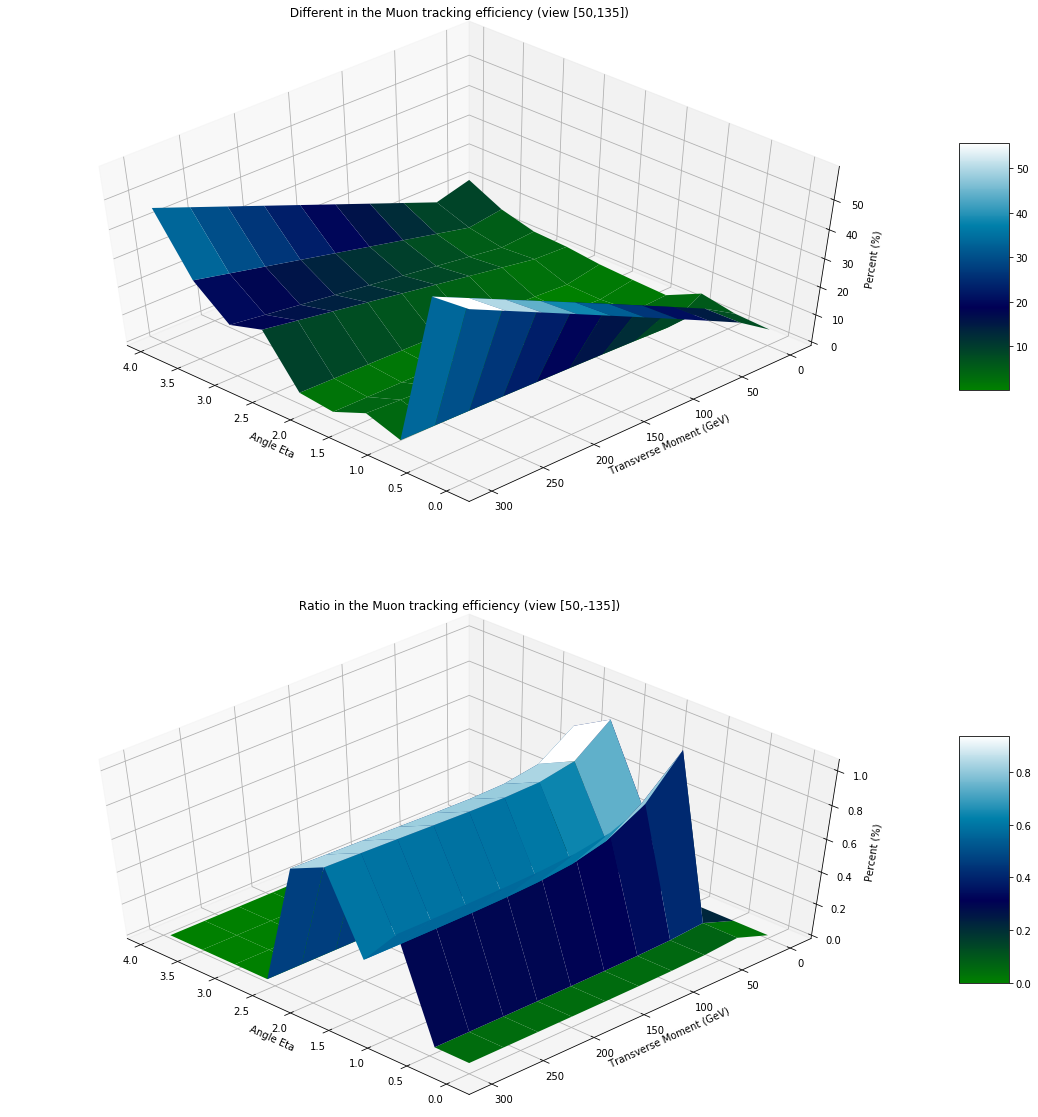

In [18]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
plot1 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_resl_diff , cmap = 'ocean')
ax.set_title(' Different in the Muon tracking efficiency (view [50,135])', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(50, 135)
fig.colorbar(plot1, shrink=0.5, aspect=5)

ax = fig.add_subplot(212, projection='3d')
plot2 = ax.plot_surface(eta_m, 
                pt_m, 
                Mu_resl_ratio , cmap = 'ocean')
ax.set_title(' Ratio in the Muon tracking efficiency (view [50,-135])', y=1.08)
ax.set_xlabel(' Angle Eta')
ax.set_ylabel(" Transverse Moment (GeV)")
ax.set_zlabel(" Percent (%)")
ax.view_init(50, 135)
fig.colorbar(plot2, shrink=0.5, aspect=5)

plt.savefig("PDF/Different in the momentum resolution of muon.pdf")